**Feature Extraction for RR Intervals Data**

1. **Mount Google Drive**:  
   Mounts Google Drive in Colab to access RR interval data files.

2. **Set File Path**:  
   Specifies the directory containing unprocessed RR interval text files.

3. **Import Libraries**:  
   Imports `numpy`, `pandas`, `matplotlib`, and `csv` for data handling, numerical operations, and visualization.

4. **Define Patient Demographics**:  
   Lists the age and gender of patients, providing demographic data for each record.

5. **Read RR Interval Data**:  
   Opens a specified text file containing RR interval data for a selected patient (e.g., file "013.txt") and reads its contents.

6. **Convert Data to Array**:  
   Splits the file data into individual values, converts these values into a floating-point list, and then stores them in a NumPy array for analysis.

7. **Define Subsection Size**:  
   Sets a subsection size (e.g., 350 samples) to divide the data into manageable segments.

8. **Segment Data and Calculate Features**:  
   Iterates over the array and divides it into non-overlapping subsections of the specified size. For each subsection, it calculates:
   - **Mean RR Interval**: Average of RR intervals in the segment.
   - **Range**: Difference between maximum and minimum RR intervals.
   - **Variance**: Measure of the variability in RR intervals.
   - **Standard Deviation**: A metric of spread within the subsection.

9. **Visualize Data Subsection**:  
   Plots a histogram of one subsection to inspect the distribution of RR intervals within that segment.

---

**Final Output**:  
The final output is a list of subsections, each containing a segment of the RR interval data with calculated features such as mean, range, variance, and standard deviation. This data is prepared for further analysis of heart rate variability and related metrics.


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
filepath = '/content/drive/MyDrive/NeuroBeat_GitHub_Repo/Data/Unprocessed/HealthyRR/'

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv

In [4]:
patient_age = [53, 0, 17, 46, 0, 38, 32, 51, 39, 24, 55, 17, 20, 39]
patient_gender = [0, -1, 1, 1, -1, 1, 0, 1, 0, 1, 0, 0, 1, 1]

In [8]:
# open the file and read its contents
with open(filepath + '013.txt', 'r') as f:
    data_str = f.read()
index = 13
# split the string into individual values based on newline character
data_list = [float(val) for val in data_str.split('\n') if val]

# convert the list to a NumPy array
data_array = np.array(data_list)

# print the array
print(data_array)
print(data_array.shape)


[664. 665. 656. ... 641. 632. 632.]
(111521,)


In [9]:

# Define the size of the subsections
sub_size = 350

# Loop over the array and extract the subsections
subsections = []
for i in range(0, len(data_array), sub_size):
    subsection = data_array[i:i+sub_size]
    subsections.append(subsection)

# Print the first few subsections to verify the output
len(subsections)

319

(array([ 3.,  0.,  1.,  0.,  0.,  6.,  0.,  9.,  0.,  0.,  7.,  0., 24.,
         0.,  7., 22.,  0., 27.,  0.,  0., 35.,  0., 36.,  0.,  4., 32.,
         0., 42.,  0., 17., 15.,  0., 22.,  0.,  0., 17.,  0.,  8.,  0.,
         2.,  5.,  0.,  3.,  0.,  2.,  1.,  0.,  1.,  0.,  2.]),
 array([593.  , 596.14, 599.28, 602.42, 605.56, 608.7 , 611.84, 614.98,
        618.12, 621.26, 624.4 , 627.54, 630.68, 633.82, 636.96, 640.1 ,
        643.24, 646.38, 649.52, 652.66, 655.8 , 658.94, 662.08, 665.22,
        668.36, 671.5 , 674.64, 677.78, 680.92, 684.06, 687.2 , 690.34,
        693.48, 696.62, 699.76, 702.9 , 706.04, 709.18, 712.32, 715.46,
        718.6 , 721.74, 724.88, 728.02, 731.16, 734.3 , 737.44, 740.58,
        743.72, 746.86, 750.  ]),
 <BarContainer object of 50 artists>)

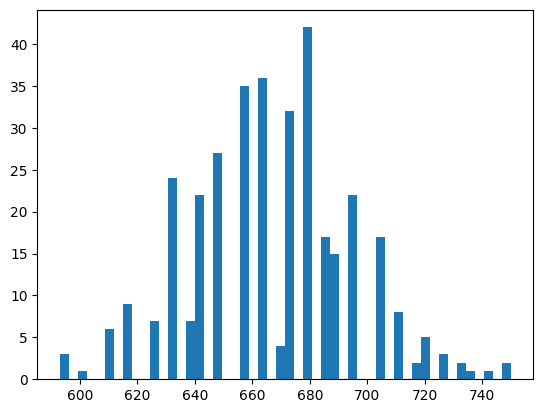

In [10]:
plt.hist(subsections[12], bins=50)

In [11]:
# Create empty arrays to store the results
bpm_arr = []
mean_arr = []
range_arr = []
iqr_arr = []
var_arr = []
std_arr = []
cv_arr = []
gender_arr = []
age_arr = []
classification = []
name = []

In [12]:
for i in range(25):
  data_clean = subsections[i]

  # Remove outliers from the data
  # df_clean = df[(df['R-R Interval (Samples)'] >= full_lower_bound) & (df['R-R Interval (Samples)'] <= full_upper_bound)]
  # data_clean = df_clean['R-R Interval (Samples)']

  beats = len(data_clean)
  total = np.sum(data_clean)
  #Average heart rate
  bpm = (beats / total) * (1000) * (60)
  # Calculate the mean HRV
  mean_rr = np.mean(data_clean)
  # Calculate the range
  range_rr = np.rint(np.max(data_clean) - np.min(data_clean))
  # Calculate the interquartile range (IQR)
  q1 = np.percentile(data_clean, 25)
  q3 = np.percentile(data_clean, 75)
  iqr_rr = q3 - q1
  # Calculate the variance
  var_rr = np.var(data_clean)
  # Calculate the standard deviation
  std_rr = np.std(data_clean)
  # Calculate the coefficient of variation
  cv_rr = std_rr / np.mean(data_clean) * 100

  bpm_arr.append(bpm)
  mean_arr.append(mean_rr)
  range_arr.append(range_rr)
  iqr_arr.append(iqr_rr)
  var_arr.append(var_rr)
  std_arr.append(std_rr)
  cv_arr.append(cv_rr)
  gender_arr.append(patient_gender[index])
  age_arr.append(patient_age[index])
  classification.append(0)
  filename = ("013_" + "%d")%i
  name.append(filename)


In [13]:
print(bpm_arr)

[90.04103298503176, 95.44456715888793, 86.73743339804221, 88.50266140146073, 83.54584478773387, 80.1597086767159, 79.44193929122659, 79.9692308864018, 81.9659333968244, 81.41017937376188, 93.44380467574999, 104.6322177545926, 89.95694917432371, 106.9170222081929, 112.26224460339354, 103.59575948024528, 97.36285746077668, 94.64831390789368, 96.49271939457711, 91.23294812755235, 85.90608419614404, 92.03583261749908, 92.64487894402484, 96.1719004025481, 92.84024845818874]


In [14]:
# set the path to the directory containing the files
new_filepath = '/content/drive/MyDrive/NeuroBeat_GitHub_Repo/Data/Unprocessed/HealthyRR/rr_013_healthy_matrix.csv'
# Write the data to the CSV file
combined = list(zip(age_arr, gender_arr, bpm_arr, mean_arr, range_arr, iqr_arr, var_arr, std_arr, cv_arr, classification, name))
with open(new_filepath, 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['Age', 'Gender', 'BPM', 'Mean', 'Range', 'IQR', 'Variance', 'Std Dev', 'Coeff of Var', 'Classification', 'File'])
    for row in combined:
        writer.writerow(row)

In [18]:
# Set the path to the output file for saving the combined data
combined_filepath = '/content/drive/MyDrive/NeuroBeat_GitHub_Repo/Data/Unprocessed/HealthyRR/combined_data.csv'

# List of individual file paths
paths = ["rr_000_healthy_matrix.csv", "rr_002_healthy_matrix.csv", "rr_003_healthy_matrix.csv", "rr_005_healthy_matrix.csv",
         "rr_006_healthy_matrix.csv", "rr_007_healthy_matrix.csv", "rr_008_healthy_matrix.csv", "rr_009_healthy_matrix.csv",
         "rr_010_healthy_matrix.csv", "rr_011_healthy_matrix.csv", "rr_013_healthy_matrix.csv"]

# Combine the data from each file into a single DataFrame
df_combined = pd.DataFrame()
for name in paths:
  df = pd.read_csv('/content/drive/MyDrive/NeuroBeat_GitHub_Repo/Data/Unprocessed/HealthyRR/' + name)
  df_combined = pd.concat([df_combined, df])

# Save the combined DataFrame to a single CSV file
df_combined.to_csv(combined_filepath, index=False, header=True)
